# **Introduction**

Le clustering est une technique d'apprentissage automatique **non supervisée** qui divise la population ou les points de données en plusieurs groupes ou clusters en anglais.  Cette méthode est basée sur deux points, qui sont de regrouper :

*   Les individus ayant des caractéristiques semblables dans un même cluster .
*   Les individus ayant des caractéristiques dissemblables dans des clusters distincts.


Plusieurs algorithmes aujourd'hui existent pour ce genre d'apprentissage notamment **K-mean et K-medoids**.
Les algorithmes K-Means et K-Medoids sont des algorithmes de machine learning non supervisé. Ils fonctionnent sur une fixation de k nombre de clusters dans lesquels des individus similaires sont regroupés et les individus dissimilaires sont différés.

 
De ce fait, l’objectif de ce travail est de determiner les avantages et inconvénients des deux algorithmes en comparant leur fonctionnement sur différents jeux de données. On étudiera ici la base de données des **'iris de Fisher'** ainsi que celle, plus grande, **mnist**.

# **I. Méthode de fonctionnement des deux algorithmes**


## *1. K-Means*






C’est l’un des algorithmes de clustering les plus répandus. 

La similarité entre deux données peut être décrite grâce à la “distance” séparant leurs descripteurs. Ainsi, deux données très similaires sont deux données dont les descripteurs sont très proches. Cette définition permet de formuler le problème de partitionnement des données comme la recherche de K “données prototypes”, autour desquelles peuvent être regroupées les autres données.

Dans le cas de l'algortihmes K-means; ces données prototypes sont appelés **centroïdes**. Les objets sont assignés à un cluster sur la base du centroïde qui est proche d'eux en termes de distance.
Un centroïde est le **point central** d'un cluster et se définit comme la moyenne des objets de ce groupe.


L'erreur à minimiser s'écrit :

<center> $ E = \sum_{j=1}^{k} \sum_{O_i \in C_j} d^2(O_i,C_i)$ </center>
où $C_i$ est le centroïde de la classe $i$. 

$d^2$ correspond à la distance Euclidienne définie par : $d^2(x_i,x_i')= \sum_{j=1}^{p} ( x_{i}^j-x_{i'}^j)^2$

**Algorithme du K-means**


1. **Initialisation** : Sélectionner k objets dans l'ensembe de données -->  centroïdes initiaux.

2. **Répéter** \\
  i) Distribuer les objets aux clusters pertinents en fonction de la valeur moyenne moyenne dont il est le plus proche. \\
  ii) Après avoir attribué de nouveaux objets à un groupe, calculez la nouvelle
nouvelle moyenne de chaque groupe.

3. **Arrêter** lorsque les centroïdes convergent

Après avoir initialisé ses centroïdes en prenant des données au hasard dans le jeu de données, K-means alterne plusieurs fois ces deux étapes pour optimiser les centroïdes et leurs groupes :

-   Regrouper chaque objet autour du centroïde le plus proche.
-   Replacer chaque centroïde selon la moyenne des descripteurs de son groupe



    

**Complexité**

<center> $C_{means} = O(t K n)$ </center> 

où 

  -  $n$ : nombre d'objets
  -  $K$ : nombre de clusters 
  -  $t$ : nombre d'itérations




## *2. K-Medoids*

L'algorithme *k-medoids* est une approche de clustering liée au clustering *k-means* pour partitionner un ensemble de données en k groupes ou clusters. 
Dans le clustering k-medoids, chaque cluster est représenté par **l'un des points de données du cluster**. Ces points sont appelés **médoïdes** de cluster. Chaque point est candidat pour être médoïde.  



L'erreur à minimiser est appelée *absolute - error criterion* et est définie par:

<center> $ E = \sum_{j=1}^{k} \sum_{O_i \in C_j} d(O_i,M_i)$ </center>
où $M_i$ est le médoïde de la classe $i$. 

$d$ correspond à la distance de Manhattan définie par : $d(x_i,x_i')= \sum_{j=1}^{p} \lvert x_{i}^j-x_{i'}^j \rvert$

\\

*NB :* Comme dans le clustering K-means, l'algorithme K-medoids demande à l'utilisateur de spécifier K, le nombre de clusters à générer. Une approche utile pour déterminer le nombre optimal de clusters est soit *la méthode de la silhouette* ou *la méthode du coude*.

**Algorithme du K-medoids**

La réalisation la plus courante du clustering k-médoïde est l'algorithme de partitionnement autour des médoïdes (PAM). PAM utilise une recherche gourmande qui peut ne pas trouver la solution optimale, mais elle est plus rapide qu'une recherche exhaustive. Cela fonctionne comme suit:



1. **Initialisation** : Sélectionner k objets dans l'ensembe de données -->  médoïdes initiaux.

2. **Répéter** \\
  i) Distribuer les objets aux clusters pertinents en fonction de la valeur du médoïde dont il est le plus proche. \\
  ii) Pour chaque médoïde $M$, et pour chaque point de données non médoïde $O_i$:
  - Considérer l'échange de $M$ et $O_i$, et calculez  le changement de coût
  - Si le coût diminue, on retient l' échange $O_i \leftrightarrow M$ 

3. **Arrêter** lorsque les médoïdes convergent

**Complexité**

<center> $C_{medoids} = O \left(t K (n-K)^2)\right) \approx O\left(tKn^2 \right)$ </center> 

où 

  -  $n$ : nombre d'objets
  -  $K$ : nombre de clusters 
  -  $t$ : nombre d'itérations




# **II. Tests sur bases de données**




## 1. Base de données "iris de Fisher"

Dans cette partie, la base de données étudiées est la base des **iris de Fisher**, qui contient 150 exemples d’iris décrites par 4 variables qui sont : la hauteur et la largeur du sépale (SepalLength and SepalWidth), la hauteur et la largeur du pétale (PetalLength and PetalWidth). L’expert (Mr Fisher) a identifié 3 classes pour ces iris dénommées Sétosa,Versicolor et Virginica. Ces classes seront utilisées pour le clustering. Les classes sont repérées par les indices 0, 1 ou 2.

### *a) Données non bruitées*

On s'intéresse dans un premier temps aux données non bruitées et on compare la performance des deux algortithmes.

In [84]:
!pip install scikit-learn-extra

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split

In [86]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns = iris.feature_names)
target = iris.target_names

datapoints=data.values
labels = iris.target

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


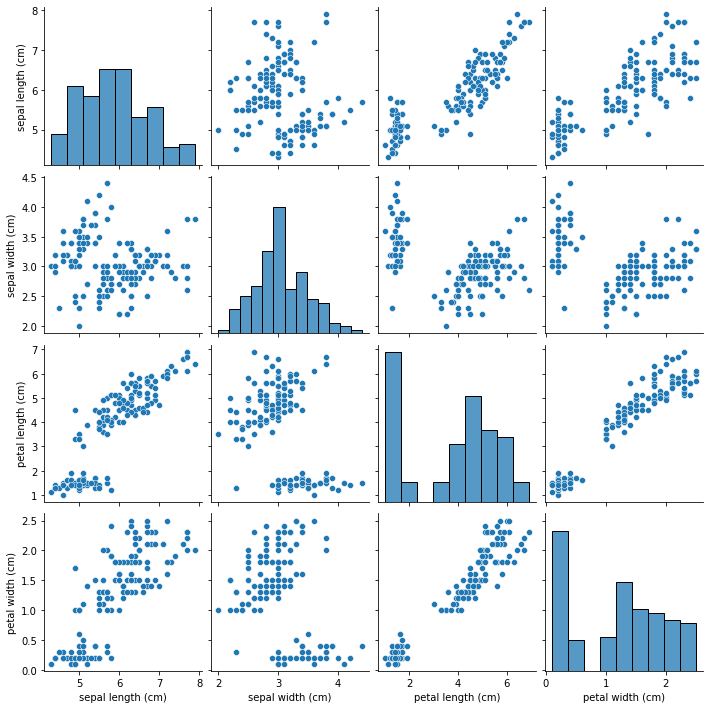

In [87]:
sns.pairplot(data)

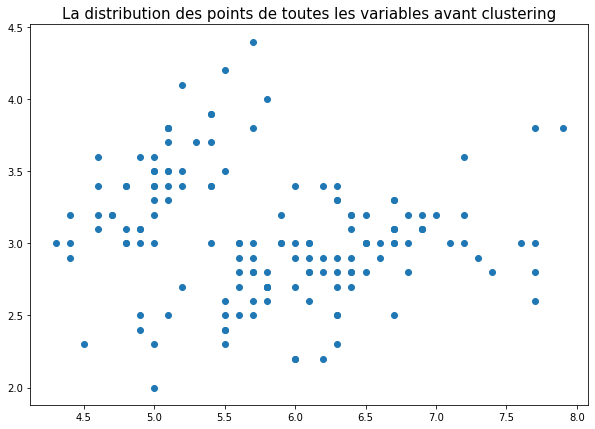

In [88]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_title('La distribution des points de toutes les variables avant clustering', fontsize=15)
plt.scatter(data.values[:,0],data.values[:,1])

En nous basant sur la longueur et la largeur de chaque sépale, on peut afficher, dans un plan 2D, les différentes fleurs de notre jeu de données.

On constate qu'à partir de la représentation des nuages de points, on ne peut distinguer que deux classes, cependant le choix de k (nombre de classes) ne doit pas être subjectif, parcontre on doit s'appuyer sur des critères bien particuliers qu'on précisera par la suite.



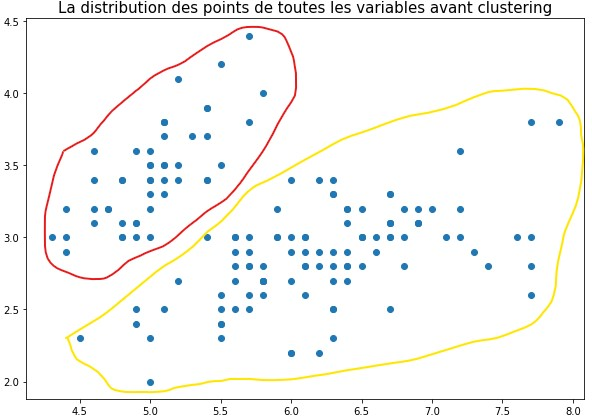

#### K-Means

On prend ici le même nombre de classes, i.e. 3, afin de pouvoir comparer les performances des 2 algorithmes.

In [89]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="k-means++", n_clusters= 3, n_init=4).fit(datapoints)

In [90]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Le tableau qu’on voit  ci-dessus représente le numéro de cluster affecté à chaque fleur. Vu qu’on a demandé un regroupement en trois clusters, on en a trois intitulés: cluster 0, cluster 1, cluster 2. 

On peut calculer la valeur finale des centroïdes, représentée dans le tableau ci-dessous.

In [91]:
centers=kmeans.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

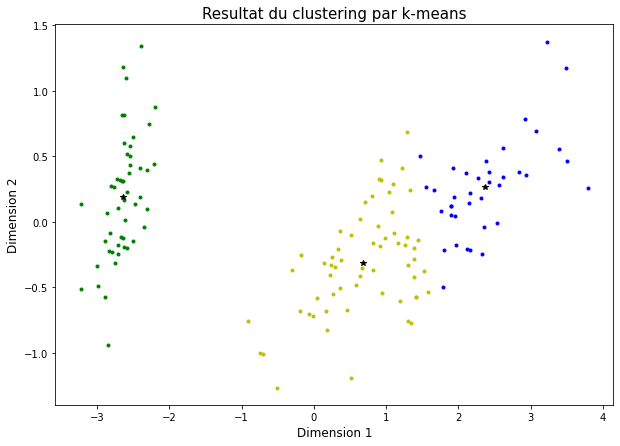

In [92]:
pca = PCA(n_components=2)
pca.fit(datapoints)
X_pca_test = pca.transform(datapoints)
X_pca_centre = pca.transform(centers)
target_= labels 
labels_ = np.unique(target_) 
color=['y','g','b']

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_title('Resultat du clustering par k-means',fontsize=15 )
ax.set_xlabel('Dimension 1', fontsize=12)
ax.set_ylabel('Dimension 2', fontsize=12)
for i,l in enumerate(kmeans.labels_):
    plt.plot(X_pca_test[i,0],X_pca_test[i,1],color[l]+'.')
for center in X_pca_centre:
    plt.plot(center[0],center[1],"k"+'*')

On remarque que le centre d'un cluster pour les K-Means est la moyenne.

In [93]:
n0 = np.bincount(kmeans.labels_)[0]
n1 = np.bincount(kmeans.labels_)[1]
n2 = np.bincount(kmeans.labels_)[2]

effectifs_kmeans = np.reshape([n0,n1,n2],(1,3))

classif = pd.DataFrame(effectifs_kmeans, index=["Population"], columns=["C1", "C2", "C3"])
classif

,C1,C2,C3
Population,62,50,38


#### K-Medoids

In [94]:

from sklearn_extra.cluster import KMedoids
import numpy as np

L'une des méthodes pour trouver le nombre optimum des clusters est la méthode du coude

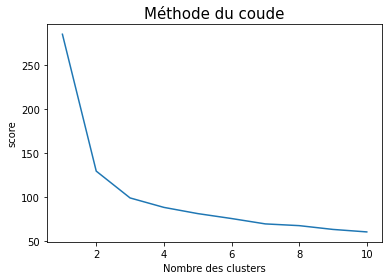

In [95]:
wcss = [] #within cluster sum of squares
for i in range (1,11):
  kmedoids = KMedoids(n_clusters=i, init='k-medoids++',max_iter=300, random_state=0)
  kmedoids.fit(datapoints)
  wcss.append(kmedoids.inertia_)

#plot
plt.plot(range (1,11),wcss)
plt.title("Méthode du coude",fontsize=15)
plt.xlabel("Nombre des clusters")
plt.ylabel("score")
plt.show()

D'après la méthode de coude on trouve que le nombre optimum des clusters est 3.

In [96]:
kmedoids = KMedoids(metric="euclidean",n_clusters=3, random_state=0).fit(datapoints)

In [97]:
kmedoids.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Le tableau  ci-dessus représente le numéro de cluster affecté à chaque fleur. Vu qu’on a demandé un regroupement en trois clusters, on en a trois intitulé cluster 0, cluster 1, cluster 2.

In [98]:
centers=kmedoids.cluster_centers_
centers

array([[6.5, 3. , 5.2, 2. ],
       [5.7, 2.8, 4.1, 1.3],
       [5. , 3.4, 1.5, 0.2]])

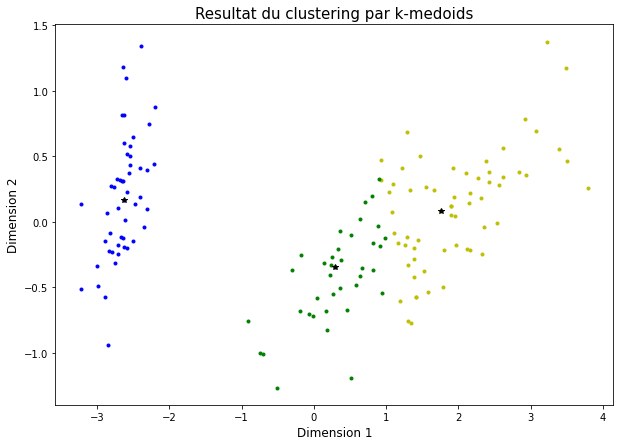

In [99]:
# Test d'une modification du code

pca = PCA(n_components=2)
pca.fit(datapoints)
X_pca_test = pca.transform(datapoints)
X_pca_centre = pca.transform(centers)
target_= labels
labels_ = np.unique(target_)
color=['y','g','b']

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_title('Resultat du clustering par k-medoids',fontsize=15 )
ax.set_xlabel('Dimension 1', fontsize=12)
ax.set_ylabel('Dimension 2', fontsize=12)
for i,l in enumerate(kmedoids.labels_):     # MODIF
    plt.plot(X_pca_test[i,0],X_pca_test[i,1],color[l]+'.',label = f'C{l}')
for center in X_pca_centre:
    plt.plot(center[0],center[1],"k"+'*',label = 'Centroids')
#plt.legend()                                                               

In [100]:
X_pca_centre

array([[ 1.76434572,  0.07885885],
       [ 0.29900084, -0.34889781],
       [-2.62614497,  0.16338496]])

Après application de l'algorithme des k-medoids on obtient les résultats de la figure ci-dessus, dont les médoïdes finals de chaque classe (étoile noir) est un point de données réel.

In [101]:
n0 = np.bincount(kmedoids.labels_)[0]
n1 = np.bincount(kmedoids.labels_)[1]
n2 = np.bincount(kmedoids.labels_)[2]

effectifs_kmedoids = np.reshape([n0,n1,n2],(1,3))

classif = pd.DataFrame(effectifs_kmedoids, index=["Population"], columns=["C1", "C2", "C3"])
classif

,C1,C2,C3
Population,62,38,50


### *b) Données bruitées*

In [102]:
def fix_order(datapoints,centers, labels ):
  centers=[list(c)for c in centers]
  datapoints=[list(d) for d in datapoints]
  centers_classes =[centers.index(center ) for center in centers]
  fix= [ (centers[i],i) for i in range(len(centers)) ]
  fix.sort() 
  sorted_centers,permutation = zip(*fix)
  new_centers_classes=[1,0,2]

  perm={}
  for old, new in zip(centers_classes,new_centers_classes):
    perm[old]=new
  return [perm[old_label] for old_label in labels ]


Essayons d'ajouter un point aberrant à notre jeu de données pour voir comment les deux algorithme se comportent, et voir comment K-means est sensible aux points aberrants.

In [103]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [104]:
point_aberrant = np.array([6., 10., 3., -1.], order='F')
datapoints=np.vstack([datapoints,point_aberrant])
labels=np.append(labels,0)
#KMedoids
kmedoids = KMedoids(metric="manhattan",n_clusters=3, random_state=0).fit(datapoints)
pca = PCA(n_components=2)
pca.fit(datapoints)
centers=kmedoids.cluster_centers_
y_predic_KMed = fix_order(datapoints,centers,kmedoids.predict(datapoints))

#KMeans
model=KMeans(n_clusters=3).fit(datapoints)
centres=model.cluster_centers_ #les centroides
y_predic_KMeans = fix_order(datapoints,centres,model.predict(datapoints))

#comparaison de perfomance

print( "Accuracy of K-Means : ",(labels==y_predic_KMeans).sum()/len(labels)*100 )
print( "Accuracy of K-Medoids : ",(labels==y_predic_KMed).sum()/len(labels)*100 )

Accuracy of K-Means :  44.370860927152314
Accuracy of K-Medoids :  90.06622516556291


K-Means est un algorithme de clustering, peut-être le plus connu. Le centre d'un cluster pour les K-Means est la moyenne. Par conséquent, il est sensible aux valeurs aberrantes.

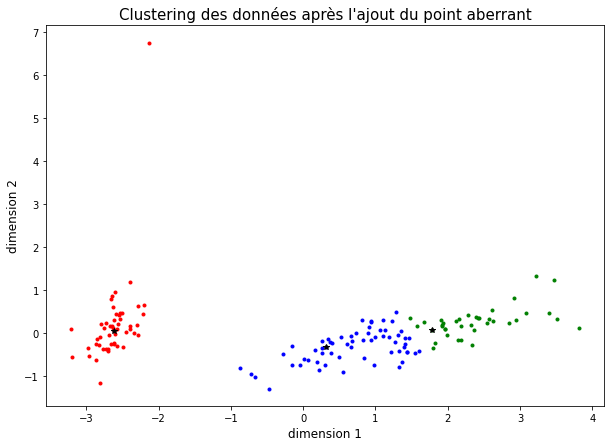

In [105]:
target= y_predic_KMeans
X_pca_test = pca.transform(datapoints)
X_pca_centre = pca.transform(centers)
labels_ = np.unique(target)
color=['r','g','b']
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
plt.xlabel('dimension 1',fontsize=12)
plt.ylabel('dimension 2',fontsize=12)
plt.title('Clustering des données après l\'ajout du point aberrant',fontsize=15)
for l in labels_:
    plt.plot(X_pca_test[np.where(target==l),0],X_pca_test[np.where(target==l),1],color[l]+'.')
for center in X_pca_centre:
    plt.plot(center[0],center[1],"k"+'*')

#2. Base de données de grande taille
On va utiliser la base MNIST qui est une base de données de chiffres écrits à la main, et qui dispose de 60000 données d'apprentissage et 10000 données de test

In [106]:
import keras
from keras.datasets import mnist 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#Loading the dataset
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [107]:
print(f'Training Data: {X_train.shape}')
print(f'Training labels: {y_train.shape}')


print(f'Testing Data: {X_test.shape}')
print(f'Testing Labels: {y_test.shape}')


Training Data: (60000, 28, 28)
Training labels: (60000,)
Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


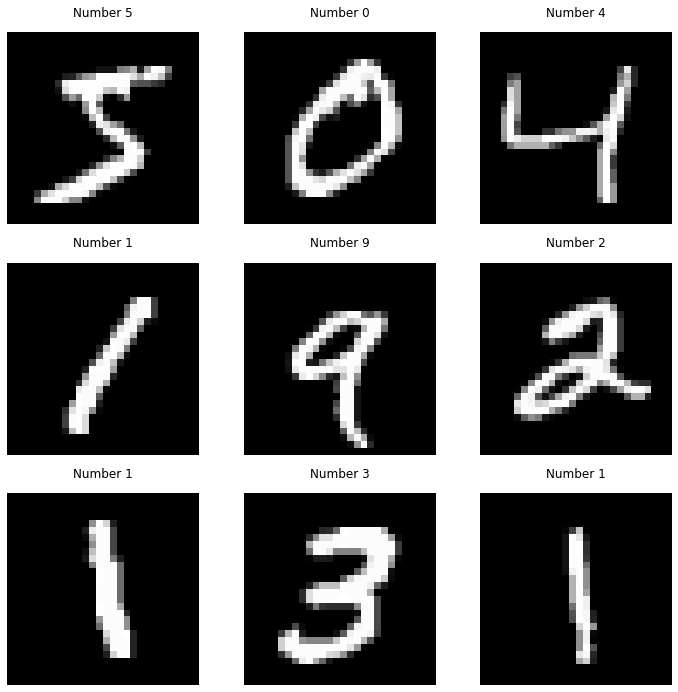

In [108]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
  ax.matshow(X_train[i])
  ax.axis('off')
  ax.set_title(f'Number {y_train[i]}')

fig.show()

*On pré-traite les données en effectuant un reshape pour obtenir des array de longueurs 784 (28x28) et on les normalise*

In [109]:

X = X_train.reshape(len(X_train),-1)
Y = y_train


X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


*On réalise maintenant le modèle en initialisant avec 9 clusters (9 digits)*

In [110]:
kmedoids = KMedoids(metric="euclidean",n_clusters=9, random_state=0).fit(X[0:20000])

In [111]:
kmedoids.labels_

array([5, 0, 3, ..., 2, 0, 1])

In [112]:
import collections
clusters=collections.Counter(kmedoids.labels_)
for i in range(0,10):
  print(f'Le cluster {i} contient {np.around((clusters[i]/20000)*100,2)}% des données')

Le cluster 0 contient 16.4% des données
Le cluster 1 contient 11.9% des données
Le cluster 2 contient 12.39% des données
Le cluster 3 contient 10.22% des données
Le cluster 4 contient 8.45% des données
Le cluster 5 contient 13.62% des données
Le cluster 6 contient 5.38% des données
Le cluster 7 contient 12.67% des données
Le cluster 8 contient 8.96% des données
Le cluster 9 contient 0.0% des données


In [114]:
acc=np.zeros(10)
nb_labels= collections.Counter(y_train[0:20000])
print(collections.Counter(y_train[0:20000]),nb_labels[1])

for i in range(len(kmedoids.labels_)):
  if kmedoids.labels_[i]==y_train[i]:
    acc[kmedoids.labels_[i]]+=1
for i in range(0,10):
  acc[i]/=nb_labels[i]
  acc[i]*=100

for i in range(0,10):
  print(f"L'accuracy d'entrainement sur le digit {i} est de {np.around(acc[i],1)}%")
print("Accuracy totale",np.round((np.sum(acc)/10),3),"%")


Counter({1: 2281, 7: 2093, 3: 2076, 9: 2014, 0: 1994, 6: 1971, 4: 1945, 2: 1929, 8: 1922, 5: 1775}) 2281
L'accuracy d'entrainement sur le digit 0 est de 30.0%
L'accuracy d'entrainement sur le digit 1 est de 42.4%
L'accuracy d'entrainement sur le digit 2 est de 10.6%
L'accuracy d'entrainement sur le digit 3 est de 4.4%
L'accuracy d'entrainement sur le digit 4 est de 9.7%
L'accuracy d'entrainement sur le digit 5 est de 36.5%
L'accuracy d'entrainement sur le digit 6 est de 1.1%
L'accuracy d'entrainement sur le digit 7 est de 20.5%
L'accuracy d'entrainement sur le digit 8 est de 4.4%
L'accuracy d'entrainement sur le digit 9 est de 0.0%
Accuracy totale 15.979 %


In [115]:
X_t = X_test.reshape(len(X_test),-1)
pred=kmedoids.predict(X_t)
pred

array([7, 2, 1, ..., 7, 7, 7])

In [116]:
acc=np.zeros(10)
print(collections.Counter(y_test[0:20000]),nb_labels[1])
nb_labels= collections.Counter(y_test[0:20000])
for i in range(len(pred)):
  if pred[i]==y_train[i]:
    acc[pred[i]]+=1
for i in range(0,10):
  acc[i]/=nb_labels[i]
  acc[i]*=100

for i in range(0,10):
  print(f"L'accuracy de test sur le digit {i} est de {np.around(acc[i],1)}%")
print("Accuracy totale",np.round((np.sum(acc)/10),3),"%")

Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892}) 2281
L'accuracy de test sur le digit 0 est de 0.0%
L'accuracy de test sur le digit 1 est de 8.2%
L'accuracy de test sur le digit 2 est de 5.9%
L'accuracy de test sur le digit 3 est de 0.0%
L'accuracy de test sur le digit 4 est de 16.9%
L'accuracy de test sur le digit 5 est de 0.0%
L'accuracy de test sur le digit 6 est de 5.6%
L'accuracy de test sur le digit 7 est de 68.8%
L'accuracy de test sur le digit 8 est de 0.0%
L'accuracy de test sur le digit 9 est de 0.0%
Accuracy totale 10.542 %


Comparaison avec le k-means

In [117]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(X[0:20000])

In [118]:
acc=np.zeros(10)
nb_labels= collections.Counter(y_train[0:20000])
print(collections.Counter(y_train[0:20000]),nb_labels[1])

for i in range(len(kmeans.labels_)):
  if kmeans.labels_[i]==y_train[i]:
    acc[kmeans.labels_[i]]+=1
for i in range(0,10):
  acc[i]/=nb_labels[i]
  acc[i]*=100

for i in range(0,10):
  print(f"L'accuracy d'entrainement sur le digit {i} est de {np.around(acc[i],1)}%")
print("Accuracy totale",np.round((np.sum(acc)/10),3),"%")


Counter({1: 2281, 7: 2093, 3: 2076, 9: 2014, 0: 1994, 6: 1971, 4: 1945, 2: 1929, 8: 1922, 5: 1775}) 1135
L'accuracy d'entrainement sur le digit 0 est de 0.6%
L'accuracy d'entrainement sur le digit 1 est de 0.0%
L'accuracy d'entrainement sur le digit 2 est de 1.0%
L'accuracy d'entrainement sur le digit 3 est de 0.8%
L'accuracy d'entrainement sur le digit 4 est de 0.5%
L'accuracy d'entrainement sur le digit 5 est de 2.0%
L'accuracy d'entrainement sur le digit 6 est de 1.2%
L'accuracy d'entrainement sur le digit 7 est de 7.3%
L'accuracy d'entrainement sur le digit 8 est de 24.2%
L'accuracy d'entrainement sur le digit 9 est de 0.0%
Accuracy totale 3.756 %


In [119]:
pred2=kmeans.predict(X_t)

In [120]:
acc=np.zeros(10)
nb_labels= collections.Counter(y_test[0:20000])
print(collections.Counter(y_test[0:20000]),nb_labels[1])

for i in range(len(pred2)):
  if pred2[i]==y_train[i]:
    acc[pred2[i]]+=1
for i in range(0,10):
  acc[i]/=nb_labels[i]
  acc[i]*=100

for i in range(0,10):
  print(f"L'accuracy de test sur le digit {i} est de {np.around(acc[i],1)}%")
print("Accuracy totale",np.round((np.sum(acc)/10),3),"%")

Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892}) 1135
L'accuracy de test sur le digit 0 est de 11.2%
L'accuracy de test sur le digit 1 est de 7.0%
L'accuracy de test sur le digit 2 est de 17.7%
L'accuracy de test sur le digit 3 est de 12.1%
L'accuracy de test sur le digit 4 est de 17.0%
L'accuracy de test sur le digit 5 est de 6.7%
L'accuracy de test sur le digit 6 est de 6.2%
L'accuracy de test sur le digit 7 est de 3.4%
L'accuracy de test sur le digit 8 est de 11.5%
L'accuracy de test sur le digit 9 est de 0.0%
Accuracy totale 9.288 %


# **Conclusion**

|   | Avantages | Inconvénients |
| --- | --- | --- |
| K-Means | Moins complexe (complexité linéaire pour n)  |-sensible aux valeurs aberrantes |
|  | | - moins robuste que K-medoids |
| K-Medoids | Robuste au bruit et aux valeurs aberrantes   ||
|  | (minimise une somme de dissimiliarité générales par paires au lieu d'une somme de distances euclediennes au carré)  |-Complexité quadratique|
|  | Réduit le bruit | |



---




